In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"~/Desktop/TempTerre.csv")
df.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.29,-0.04,-0.37,-0.12,-0.02,-0.80,-0.48,-0.29,-0.16,-0.09,-0.04,0.05,0.66
1,1881,-0.08,-0.18,0.01,-0.35,0.11,-0.07,-0.91,-0.43,-0.21,0.09,0.12,-0.05,-0.07,0.58
2,1882,-0.11,-0.22,-0.01,-0.31,-0.04,0.01,-1.41,-0.26,-0.17,-0.06,-0.03,0.01,0.04,0.61
3,1883,-0.17,-0.29,-0.06,-0.35,-0.16,-0.01,-0.19,-0.54,-0.28,-0.18,-0.14,-0.04,0.07,0.49
4,1884,-0.28,-0.43,-0.14,-0.60,-0.14,-0.14,-1.30,-0.62,-0.48,-0.13,-0.15,-0.19,-0.02,0.64


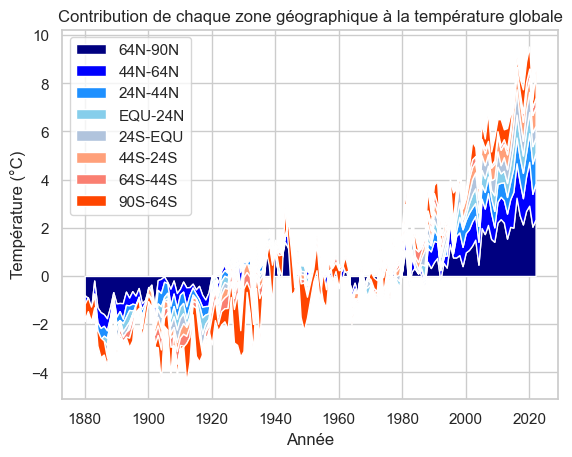

In [76]:
import matplotlib.colors as mcolors
import numpy as np

# Création de la colormap personnalisée avec des couleurs allant du bleu foncé au rouge
colors = ["navy", "blue", "dodgerblue", "skyblue", "lightsteelblue", "lightsalmon", "salmon", "orangered"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors)

# Sélection des colonnes pour chaque zone géographique
cols = ['64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S', '64S-44S', '90S-64S']
df_zones = df[cols]

# Création du graphique en aires empilées avec la colormap personnalisée
fig, ax = plt.subplots()
ax.stackplot(df['Year'], df_zones.T, labels=df_zones.columns, colors=cmap(np.linspace(0, 1, len(cols))))

# Paramètres du graphique
plt.title("Contribution de chaque zone géographique à la température globale")
plt.xlabel("Année")
plt.ylabel("Température (°C)")
plt.legend(loc='upper left')

plt.show()


In [14]:
variations_temp_globale = df['Glob']

# Calcul de la moyenne
moyenne = np.mean(variations_temp_globale)

# Calcul de l'écart-type
ecart_type = np.std(variations_temp_globale)

# Calcul de la médiane
mediane = np.median(variations_temp_globale)

# Calcul du minimum et du maximum
minimum = np.min(variations_temp_globale)
maximum = np.max(variations_temp_globale)

# Affichage des statistiques
print("Moyenne Global:", moyenne)
print("Écart-type Global :", ecart_type)
print("Médiane Global :", mediane)
print("Minimum Global :", minimum)
print("Maximum Global :", maximum)




Moyenne Global: 0.0606293706293707
Écart-type Global : 0.3660777111569312
Médiane Global : -0.06
Minimum Global : -0.48
Maximum Global : 1.02


In [15]:
# Calcul des statistiques descriptives pour les variations de température de 64N à 90N
variations_64N_90N = df['64N-90N']

# Calcul de la moyenne
moyenne = np.mean(variations_64N_90N)

# Calcul de l'écart-type
ecart_type = np.std(variations_64N_90N)

# Calcul de la médiane
mediane = np.median(variations_64N_90N)

# Calcul du minimum et du maximum
minimum = np.min(variations_64N_90N)
maximum = np.max(variations_64N_90N)

# Affichage des statistiques
print("Moyenne :", moyenne)
print("Écart-type :", ecart_type)
print("Médiane :", mediane)
print("Minimum :", minimum)
print("Maximum :", maximum)

Moyenne : 0.26496503496503493
Écart-type : 0.9939958732209322
Médiane : 0.09
Minimum : -1.76
Maximum : 3.25


In [16]:
# Calcul des statistiques descriptives pour les variations de température de 90S à 64S
variations_90S_64S = df['90S-64S']

# Calcul de la moyenne
moyenne = np.mean(variations_90S_64S)

# Calcul de l'écart-type
ecart_type = np.std(variations_90S_64S)

# Calcul de la médiane
mediane = np.median(variations_90S_64S)

# Calcul du minimum et du maximum
minimum = np.min(variations_90S_64S)
maximum = np.max(variations_90S_64S)

# Affichage des statistiques
print("Moyenne :", moyenne)
print("Écart-type :", ecart_type)
print("Médiane :", mediane)
print("Minimum :", minimum)
print("Maximum :", maximum)

Moyenne : -0.08391608391608392
Écart-type : 0.7578447863717337
Médiane : 0.04
Minimum : -2.6
Maximum : 1.22


Coefficients : [0.00774664]
Intercept : -15.053071177648635


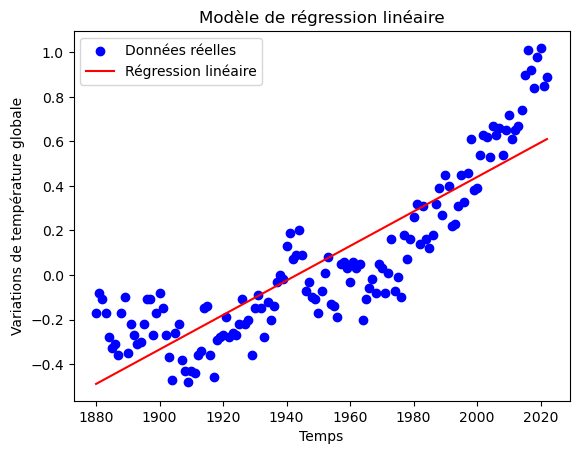

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# Extraire les variables indépendantes (le temps) et la variable dépendante (les variations de température globale)
X = df['Year'].values.reshape(-1, 1)
y = df['Glob'].values

# Créer un objet de modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X, y)

# Faire des prédictions sur les données d'entraînement
y_pred = model.predict(X)

# Afficher les coefficients du modèle
print('Coefficients :', model.coef_)
print('Intercept :', model.intercept_)

# Tracer le graphique des variations de température globale au fil du temps
plt.scatter(X, y, color='b', label='Données réelles')
plt.plot(X, y_pred, color='r', label='Régression linéaire')
plt.xlabel('Temps')
plt.ylabel('Variations de température globale')
plt.title('Modèle de régression linéaire')
plt.legend()
plt.show()

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S', '64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S', '64S-44S', '90S-64S']]
y = df['Glob']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_true = y_test


print('Coefficients :', model.coef_)
print('Intercept :', model.intercept_)




Coefficients : [ 2.25317900e-01  6.78162142e-02  1.68450212e-01  2.51060548e-01
  2.67213064e-01 -4.68340641e-04 -9.41889438e-04 -4.21324475e-03
 -2.09272766e-02  5.08561454e-02  7.17289986e-04 -3.75757666e-03
 -2.14548251e-04]
Intercept : -0.00012859268308575145


In [54]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_true, y_pred)

# Affichage des résultats
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 0.0030717092561487374
MAE: 0.0023986707931362523
R²: 0.9998937133561836


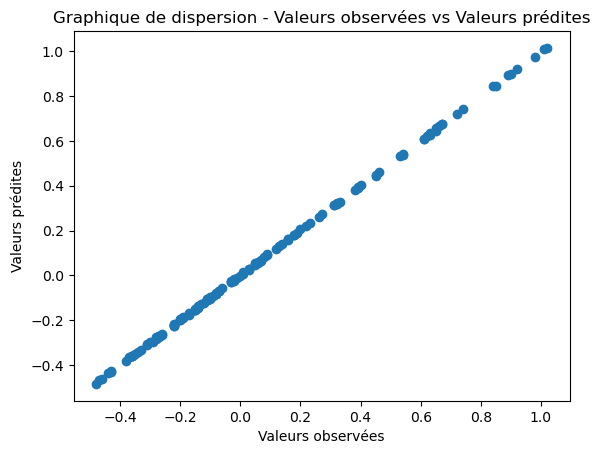

In [33]:
import matplotlib.pyplot as plt

# Obtention des valeurs observées et prédites
observed_values = df['Glob']  # Valeurs observées
predicted_values = model.predict(X)  # Valeurs prédites par le modèle

# Tracé du graphique de dispersion
plt.scatter(observed_values, predicted_values)
plt.xlabel('Valeurs observées')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de dispersion - Valeurs observées vs Valeurs prédites')
plt.show()

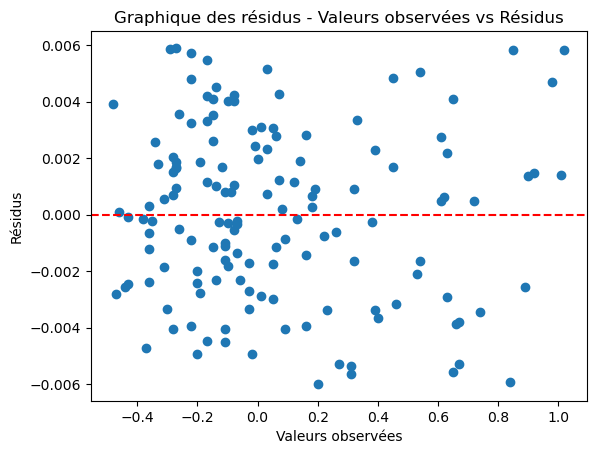

In [34]:
residuals = observed_values - predicted_values

# Tracé du graphique des résidus
plt.scatter(observed_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Ligne horizontale à y=0 pour référence
plt.xlabel('Valeurs observées')
plt.ylabel('Résidus')
plt.title('Graphique des résidus - Valeurs observées vs Résidus')
plt.show()

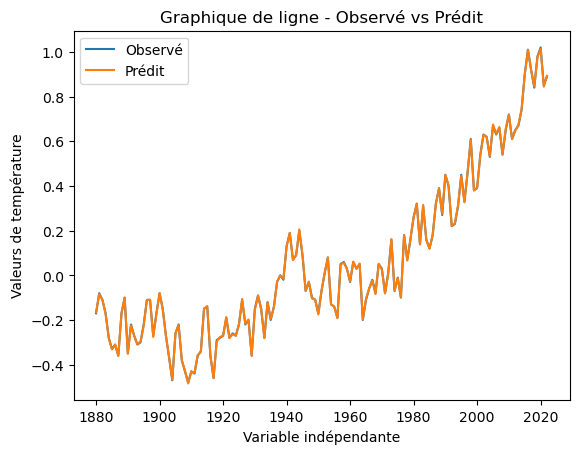

In [35]:
# Obtention des valeurs observées et prédites
observed_values = df['Glob']  # Valeurs observées
predicted_values = model.predict(X)  # Valeurs prédites par le modèle

# Obtention de la variable indépendante (par exemple, les années)
independent_variable = df['Year']

# Tracé du graphique de ligne
plt.plot(independent_variable, observed_values, label='Observé')
plt.plot(independent_variable, predicted_values, label='Prédit')
plt.xlabel('Variable indépendante')
plt.ylabel('Valeurs de température')
plt.title('Graphique de ligne - Observé vs Prédit')
plt.legend()
plt.show()

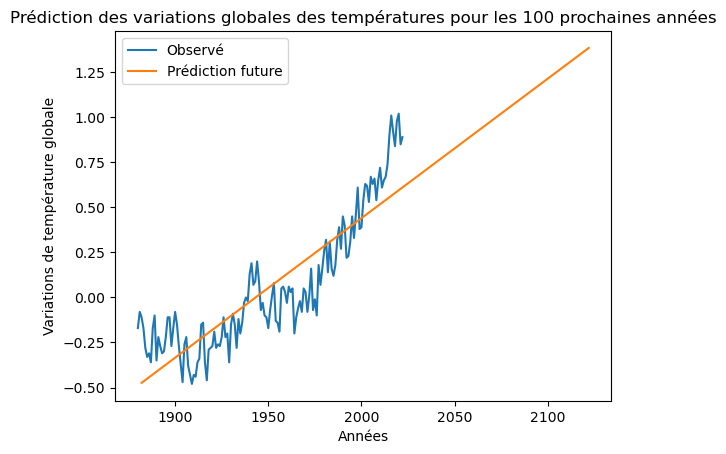

In [49]:

import pandas as pd
from sklearn.linear_model import LinearRegression

# Sélection des colonnes appropriées
independent_vars = df[['Year']]
dependent_var = df['Glob']

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(independent_vars, dependent_var)

# Prédiction des valeurs pour les 100 prochaines années
future_years = np.arange(df['Year'].max() - 140, df['Year'].max() + 101)
future_data = pd.DataFrame({'Year': future_years})
future_predictions = model.predict(future_data)

# Tracé du graphique des prédictions futures
plt.plot(df['Year'], dependent_var, label='Observé')
plt.plot(future_years, future_predictions, label='Prédiction future')
plt.xlabel('Années')
plt.ylabel('Variations de température globale')
plt.title('Prédiction des variations globales des températures pour les 100 prochaines années')
plt.legend()
plt.show()


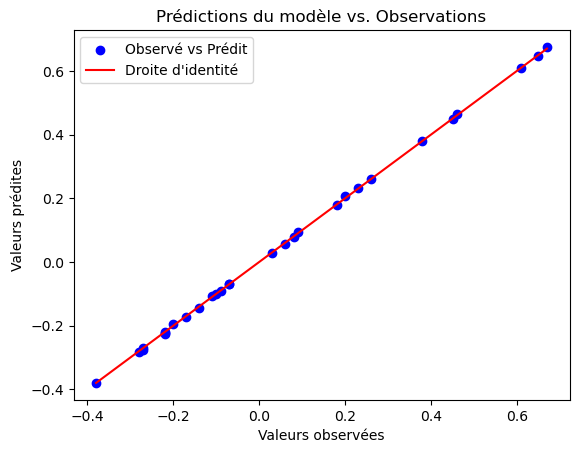

In [56]:
# Tracer les valeurs observées
plt.scatter(y_true, y_pred, color='b', label='Observé vs Prédit')

# Tracer la droite d'identité (y = x) pour référence
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='r', label='Droite d\'identité')

# Étiquettes et titre du graphique
plt.xlabel('Valeurs observées')
plt.ylabel('Valeurs prédites')
plt.title('Prédictions du modèle vs. Observations')

# Légende
plt.legend()

# Afficher le graphique
plt.show()

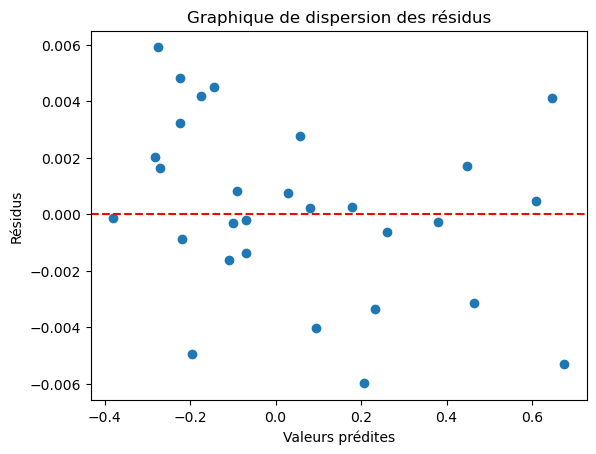

In [57]:
# Calculer les résidus
residuals = y_true - y_pred

# Tracer le graphique de dispersion des résidus
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique de dispersion des résidus')

# Afficher le graphique
plt.show()